qPCA Demo

In [ ]:
!pip install qiskit_algorithms
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512615 sha256=f6377009f7d5fc2f6a59c896ee2ab11e995dce52f661f07656e821a193667a9d
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d51

In [ ]:
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 12345

In [ ]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import ZZFeatureMap #angle/phase encoding
from qiskit.primitives import Sampler #a Sampler is an object used for running quantum circuits on a quantum device or simulator.
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features(ax, features, labels, class_labels, marker, face, edge, label):
    ax.scatter(
        features[np.where(labels[:] == class_labels), 0],
        features[np.where(labels[:] == class_labels), 1],
        marker = marker,
        facecolors = face,
        edgecolors = edge,
        label = label,
    )

def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):
    plt.figure(figsize = (5,5))
    plt.ylim(0, 2*np.pi)
    plt.xlim(0, 2*np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation = "nearest",
        origin = "lower",
        cmap = "RdBu",
        extent = [0,2*np.pi, 0, 2*np.pi],
    )

In [ ]:
adhoc_dimension = 2
train_features, train_labels, test_features,test_labels, adhoc_total = ad_hoc_data(
    training_size = 25,
    test_size = 10,
    n = adhoc_dimension,
    gap = 0.6,
    plot_data = False,
    one_hot = False,
    include_sample_total = True,
)


In [ ]:
train_features

array([[4.27256601, 5.65486678],
       [4.77522083, 2.95309709],
       [5.2150438 , 3.01592895],
       [3.76991118, 5.2150438 ],
       [2.32477856, 3.83274304],
       [5.0893801 , 1.25663706],
       [2.07345115, 1.50796447],
       [2.136283  , 0.50265482],
       [4.33539786, 2.63893783],
       [1.82212374, 1.31946891],
       [0.9424778 , 0.31415927],
       [2.57610598, 1.00530965],
       [1.44513262, 3.14159265],
       [2.136283  , 3.01592895],
       [4.1469023 , 3.20442451],
       [5.34070751, 3.01592895],
       [0.        , 4.77522083],
       [5.52920307, 0.31415927],
       [4.1469023 , 0.        ],
       [4.20973416, 0.56548668],
       [0.69115038, 3.20442451],
       [2.51327412, 1.0681415 ],
       [0.31415927, 6.09468975],
       [4.27256601, 5.52920307],
       [0.18849556, 4.77522083],
       [0.18849556, 0.9424778 ],
       [3.26725636, 1.69646003],
       [4.77522083, 5.84336234],
       [1.44513262, 5.96902604],
       [2.95309709, 4.27256601],
       [2.

In [ ]:
train_features.shape

(50, 2)

In [ ]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
test_features

array([[5.96902604, 1.25663706],
       [5.59203492, 1.0681415 ],
       [3.83274304, 2.32477856],
       [4.39822972, 5.27787566],
       [1.88495559, 3.14159265],
       [0.62831853, 5.02654825],
       [1.82212374, 3.0787608 ],
       [1.94778745, 2.95309709],
       [0.62831853, 1.31946891],
       [0.87964594, 5.40353936],
       [5.59203492, 4.58672527],
       [0.06283185, 1.00530965],
       [6.09468975, 0.9424778 ],
       [3.0787608 , 1.25663706],
       [3.0787608 , 1.19380521],
       [4.77522083, 6.22035345],
       [1.44513262, 5.84336234],
       [0.06283185, 1.25663706],
       [3.14159265, 1.00530965],
       [3.14159265, 4.1469023 ]])

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
adhoc_total.shape

(100, 100)

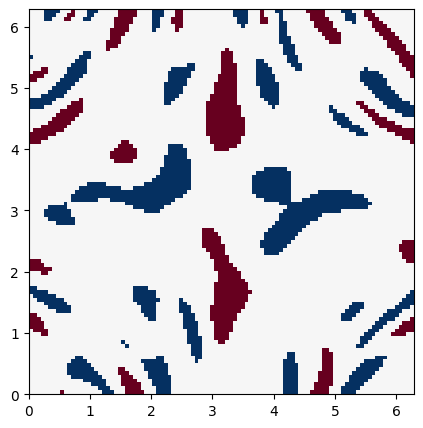

In [ ]:
plot_dataset(train_features, train_labels, test_features,test_labels, adhoc_total)

In [ ]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps = 2, entanglement = "linear")

sampler = Sampler() # This allows you to use different backends (real quantum devices or simulators) as samplers.

fidelity = ComputeUncompute(sampler = sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity = fidelity, feature_map = adhoc_feature_map)

In [ ]:
adhoc_feature_map.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘

In [ ]:
adhoc_kernel.feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [ ]:
feature_map = ZZFeatureMap(feature_dimension = 2, reps = 2, entanglement = "linear")
qpca_kernel = FidelityQuantumKernel(fidelity = fidelity, feature_map = feature_map)

In [ ]:
feature_map.decompose().draw()

┌───┐┌─────────────┐                                          ┌───┐»
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──┤ H ├»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘└───┘»
«     ┌─────────────┐                                          
«q_0: ┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
«     ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
«q_1: ┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └─────────────┘└───┘└──────────────────────────────┘└───┘

In [ ]:
feature_map.decompose().decompose().draw()

┌─────────┐┌─────────────────┐                                         »
q_0: ┤ U2(0,π) ├┤ U(0,0,2.0*x[0]) ├──■──────────────────────────────────────»
     ├─────────┤├─────────────────┤┌─┴─┐┌──────────────────────────────────┐»
q_1: ┤ U2(0,π) ├┤ U(0,0,2.0*x[1]) ├┤ X ├┤ U(0,0,2.0*(π - x[0])*(π - x[1])) ├»
     └─────────┘└─────────────────┘└───┘└──────────────────────────────────┘»
«          ┌─────────┐┌─────────────────┐     »
«q_0: ──■──┤ U2(0,π) ├┤ U(0,0,2.0*x[0]) ├──■──»
«     ┌─┴─┐├─────────┤├─────────────────┤┌─┴─┐»
«q_1: ┤ X ├┤ U2(0,π) ├┤ U(0,0,2.0*x[1]) ├┤ X ├»
«     └───┘└─────────┘└─────────────────┘└───┘»
«                                              
«q_0: ──────────────────────────────────────■──
«     ┌──────────────────────────────────┐┌─┴─┐
«q_1: ┤ U(0,0,2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────────────────────────┘└───┘

In [ ]:
qpca_kernel.feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [ ]:
matrix_train = qpca_kernel.evaluate(x_vec = train_features)
matrix_test = qpca_kernel.evaluate(x_vec = test_features, y_vec = train_features)

In [ ]:
matrix_train

array([[1.        , 0.64345395, 0.60691834, ..., 0.43773559, 0.0489581 ,
        0.04392532],
       [0.64345395, 1.        , 0.78340488, ..., 0.26223556, 0.0460048 ,
        0.08238447],
       [0.60691834, 0.78340488, 1.        , ..., 0.08904577, 0.06730458,
        0.11299809],
       ...,
       [0.43773559, 0.26223556, 0.08904577, ..., 1.        , 0.12257275,
        0.08629315],
       [0.0489581 , 0.0460048 , 0.06730458, ..., 0.12257275, 1.        ,
        0.84079759],
       [0.04392532, 0.08238447, 0.11299809, ..., 0.08629315, 0.84079759,
        1.        ]])

In [ ]:
matrix_test

array([[6.00793670e-01, 7.41631841e-01, 5.44191869e-01, 5.06547712e-01,
        5.21465433e-01, 2.07750694e-02, 2.66461876e-01, 5.55555864e-01,
        9.37290377e-01, 1.25603533e-02, 4.44107118e-01, 6.76876589e-01,
        5.03757726e-01, 5.04869870e-01, 4.08488521e-01, 4.57844662e-01,
        7.48502722e-01, 6.21851713e-01, 4.57313893e-01, 3.20443526e-01,
        4.91315192e-01, 5.65840330e-01, 3.28905057e-02, 6.24430472e-01,
        6.53419211e-01, 3.80979872e-02, 1.84854140e-01, 1.63080520e-01,
        1.27479148e-01, 1.41260122e-01, 9.83440567e-02, 1.41805054e-01,
        2.06060386e-01, 2.63652561e-01, 1.11995076e-01, 5.00669566e-02,
        1.09971384e-01, 2.78063790e-01, 5.50875619e-01, 3.38085166e-01,
        2.27316094e-01, 9.20155710e-02, 7.00699833e-02, 1.09613779e-01,
        1.67990646e-01, 1.37130363e-02, 5.59128978e-02, 8.31282117e-02,
        2.06060386e-01, 7.46836791e-02],
       [8.28676436e-01, 4.54729435e-01, 5.42491018e-01, 6.88566971e-01,
        7.06242816e-01,

In [ ]:
qpca_kernel


In [ ]:
from sklearn.decomposition import KernelPCA

kernel_pca_rbf = KernelPCA(n_components = 2,kernel = "rbf")
kernel_pca_rbf.fit(train_features)
train_features_rbf = kernel_pca_rbf.transform(train_features)
test_features_rbf = kernel_pca_rbf.transform(test_features)

kernel_pca_q = KernelPCA(n_components = 2, kernel = "precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

In [ ]:
train_features_rbf

array([[-0.43583205, -0.11127695],
       [-0.09827468,  0.54368508],
       [-0.14909087,  0.61109764],
       [-0.55219082, -0.36496816],
       [-0.34472704, -0.31692237],
       [-0.0230303 ,  0.3532069 ],
       [ 0.47087108, -0.13120613],
       [ 0.29496731, -0.00511986],
       [ 0.06331373,  0.37609917],
       [ 0.35561957, -0.05724481],
       [-0.01872054,  0.16025516],
       [ 0.5731697 , -0.14860668],
       [-0.13790346,  0.02689572],
       [-0.00357876, -0.15559546],
       [-0.07985116,  0.25924788],
       [-0.15603685,  0.61381109],
       [-0.21243648,  0.36151795],
       [-0.09834257,  0.27768662],
       [ 0.03959726,  0.19422651],
       [ 0.15164114,  0.17618975],
       [-0.1765226 ,  0.1901871 ],
       [ 0.57694923, -0.15447628],
       [-0.17679074,  0.28384314],
       [-0.45071529, -0.13301994],
       [-0.22309422,  0.36239408],
       [-0.08575535,  0.18737272],
       [ 0.67669336, -0.17625629],
       [-0.34877865,  0.0596271 ],
       [-0.22271735,

In [ ]:
train_features_q.shape

(50, 2)

In [ ]:
test_features_rbf

array([[-0.11796855,  0.33334172],
       [-0.09525981,  0.33969982],
       [ 0.33675451,  0.09708732],
       [-0.44599113, -0.11455185],
       [-0.09298296, -0.09943043],
       [-0.2405433 ,  0.32247157],
       [-0.07762086, -0.07879433],
       [-0.00866196, -0.10742549],
       [-0.03207613,  0.15753563],
       [-0.23528389,  0.27273256],
       [-0.22260643,  0.29379316],
       [-0.09394978,  0.18783451],
       [-0.11771567,  0.28787303],
       [ 0.67617702, -0.18144568],
       [ 0.66181229, -0.17234264],
       [-0.30362643,  0.09475252],
       [-0.23535133,  0.14956141],
       [-0.09391193,  0.18408261],
       [ 0.59906242, -0.13161294],
       [-0.48775827, -0.4676936 ]])

In [ ]:
train_features_q

array([[-0.55503502,  0.07923032],
       [-0.58676147, -0.08772943],
       [-0.59382533, -0.23549206],
       [-0.54285457,  0.12581656],
       [-0.31865254,  0.52147892],
       [-0.09885318,  0.75120647],
       [-0.43627762, -0.27501966],
       [-0.46208992,  0.43635021],
       [-0.44884068,  0.09484447],
       [-0.16373473,  0.58186484],
       [-0.49956763, -0.38608327],
       [-0.49363459,  0.05312043],
       [-0.55246775, -0.1729477 ],
       [-0.55492991, -0.40487528],
       [-0.53716952, -0.36478571],
       [-0.55961796, -0.28995991],
       [-0.470649  , -0.11800922],
       [-0.56413667,  0.11319325],
       [-0.54565969, -0.39609464],
       [-0.3447506 , -0.13450906],
       [-0.44696335, -0.40610805],
       [-0.45772824, -0.1058859 ],
       [-0.10443968,  0.68880703],
       [-0.5192437 ,  0.29979044],
       [-0.61850202, -0.18135537],
       [ 0.48309257, -0.21584314],
       [ 0.59684767,  0.12003704],
       [ 0.5537754 , -0.26414466],
       [ 0.65529716,

In [ ]:
test_features_q

array([[-0.40581527, -0.05166188],
       [-0.40015424, -0.0121193 ],
       [-0.14562142,  0.57152926],
       [-0.43221603,  0.44994473],
       [-0.63535825, -0.27527967],
       [-0.55136462, -0.35177173],
       [-0.60401336, -0.23728917],
       [-0.53461625, -0.27291853],
       [-0.5358296 , -0.35333862],
       [-0.32300996,  0.26529087],
       [ 0.18978895,  0.28506888],
       [ 0.46610061, -0.14633504],
       [ 0.42084924, -0.25009388],
       [ 0.601556  , -0.03979555],
       [ 0.60008257, -0.07986394],
       [ 0.42573038,  0.02051096],
       [ 0.58086037, -0.09689484],
       [ 0.46307021, -0.20686733],
       [ 0.59491897, -0.25148602],
       [ 0.59491897, -0.25148602]])

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_rbf, train_labels)

logistic_score = logistic_regression.score(test_features_rbf, test_labels)
print(f"Logistic regression score: {logistic_score}")

Logistic regression score: 0.5


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, train_labels)

logistic_score = logistic_regression.score(test_features_q, test_labels)
print(f"Logistic regression score: {logistic_score}")

Logistic regression score: 1.0


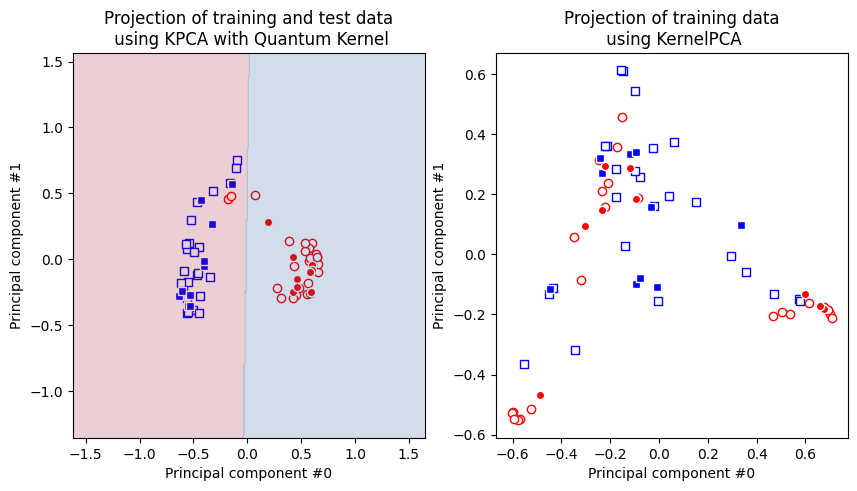

In [ ]:
fig, (q_ax, rbf_ax) = plt.subplots(1,2,figsize = (10,5))

plot_features(q_ax, train_features_q, train_labels, 0 , "s", "w", "b", "A train")
plot_features(q_ax, train_features_q, train_labels, 1, "o", "w", "r", "B train")

plot_features(q_ax, test_features_q, test_labels, 0, "s", "b", "w", "A test")
plot_features(q_ax, test_features_q, test_labels, 1, "o", "r", "w", "A test")

q_ax.set_ylabel("Principal component #1")
q_ax.set_xlabel("Principal component #0")
q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

# Plotting the linear separation
h = 0.01  # step size in the mesh

# create a mesh to plot in
x_min, x_max = train_features_q[:, 0].min() - 1, train_features_q[:, 0].max() + 1
y_min, y_max = test_features_q[:, 1].min() - 1, test_features_q[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

plot_features(rbf_ax, train_features_rbf, train_labels, 0, "s", "w", "b", "A train")
plot_features(rbf_ax, train_features_rbf, train_labels, 1, "o", "w", "r", "B train")
plot_features(rbf_ax, test_features_rbf, test_labels, 0, "s", "b", "w", "A test")
plot_features(rbf_ax, test_features_rbf, test_labels, 1, "o", "r", "w", "A test")

rbf_ax.set_ylabel("Principal component #1")
rbf_ax.set_xlabel("Principal component #0")
rbf_ax.set_title("Projection of training data\n using KernelPCA")
plt.show()
# Plotting the linear separation
h = 0.01  # step size in the mesh

# create a mesh to plot in
x_min, x_max = train_features_rbf[:, 0].min() - 1, train_features_rbf[:, 0].max() + 1
y_min, y_max = test_features_rbf[:, 1].min() - 1, test_features_rbf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
predictions = predictions.reshape(xx.shape)
rbf_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)
